In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np


In [5]:
url = "https://api.vitaldb.net/cases"
surgery_data = pd.read_csv(url)
surgery_data['opname'].unique()

array(['Low anterior resection', 'Subtotal gastrectomy',
       'Cholecystectomy', 'Distal gastrectomy', 'Aneurysmal repair',
       'Lung lobectomy', 'Breast-conserving surgery',
       'Transurethral resection of bladder tumor',
       'Liver transplantation', 'Metastasectomy', 'Hernia repair',
       'Liver segmentectomy', 'Transanal excision',
       'Pylorus preserving pancreaticoduodenectomy', 'Anterior resection',
       'Total thyroidectomy', 'Gastric wedge resection',
       'Total gastrectomy', 'Thymectomy', 'Donor hepatectomy',
       'Lung wedge resection', 'Nephrectomy', 'Fistulectomy',
       'Abdominoperineal resection', 'Kidney transplantation',
       'Radical prostatectomy', 'Donor nephrectomy', 'Hemihepatectomy',
       'Ileostomy repair', 'Diagnostic laparoscopy',
       'Radical hysterectomy', 'Bullectomy', 'Excision',
       'Thyroid lobectomy', 'Small bowel segmental resection',
       'Appendectomy', 'Colostomy', 'Adrenalectomy',
       'Debridement of wound', '

Text(0.5, 1.0, 'Distribution of Operation in the Hospital')

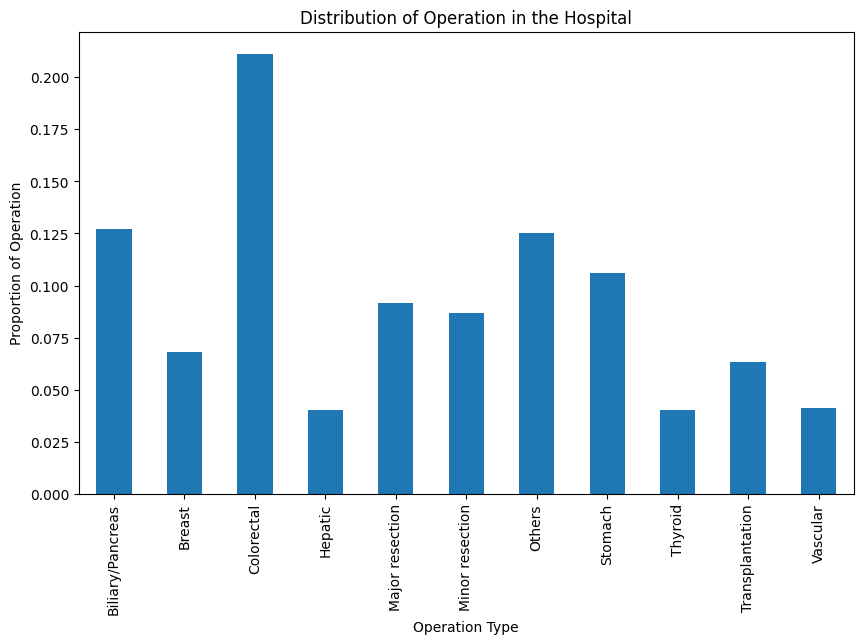

In [68]:
df = surgery_data[['optype', 'weight', 'sex']].copy()
plt.figure(figsize=(10, 6))
df['optype'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.xlabel('Operation Type')
plt.ylabel('Proportion of Operation')
plt.title('Distribution of Operation in the Hospital')

Text(0.5, 1.0, 'Distribution of Operations in the Hospital')

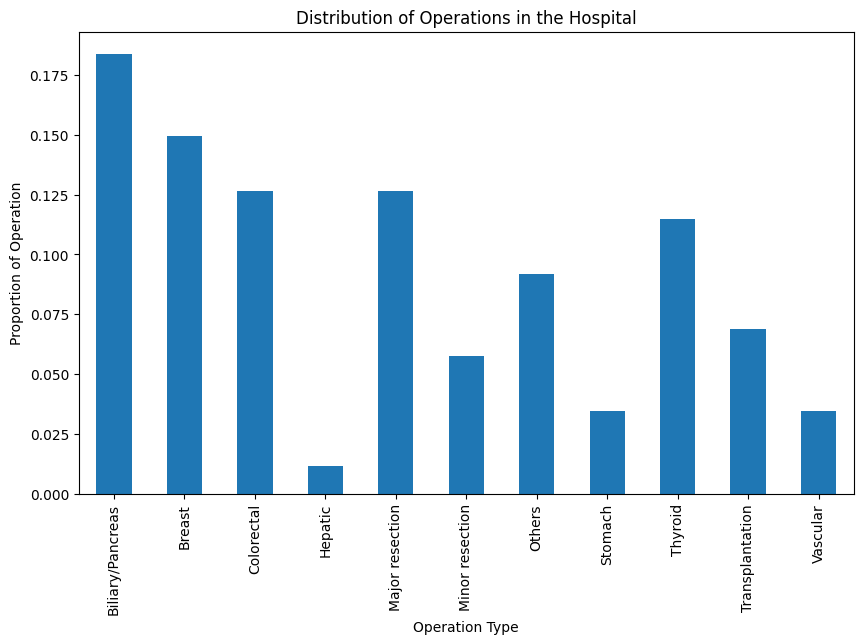

In [77]:
df = surgery_data[['optype', 'weight', 'sex']].copy()
df = df.query('weight > 80 and sex == "F"')
plt.figure(figsize=(10, 6))
df['optype'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.xlabel('Operation Type')
plt.ylabel('Proportion of Operation')
plt.title('Distribution of Operations in the Hospital')


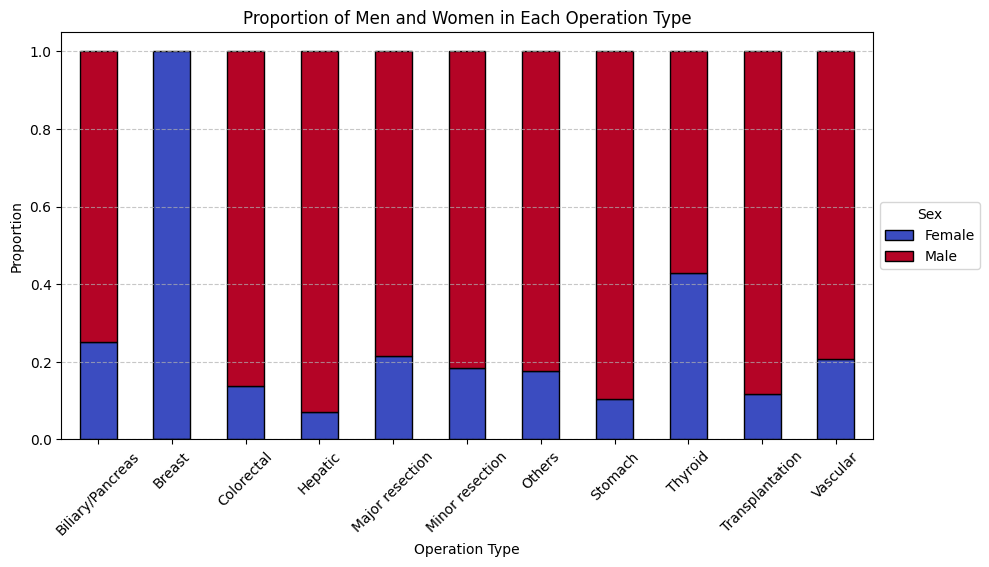

In [94]:

df = surgery_data[['optype', 'weight', 'sex']].copy()
df = df.query('weight > 70')
# Compute proportions of each sex within each operation type
optype_sex_counts = df.groupby(['optype', 'sex']).size().unstack(fill_value=0)
optype_sex_props = optype_sex_counts.div(optype_sex_counts.sum(axis=1), axis=0)  # Normalize within each optype

# Plot stacked bar chart
optype_sex_props.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', edgecolor='black')

# Labels and title
plt.xlabel('Operation Type')
plt.ylabel('Proportion')
plt.title('Proportion of Men and Women in Each Operation Type')
plt.legend(title='Sex', labels=['Female', 'Male'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)



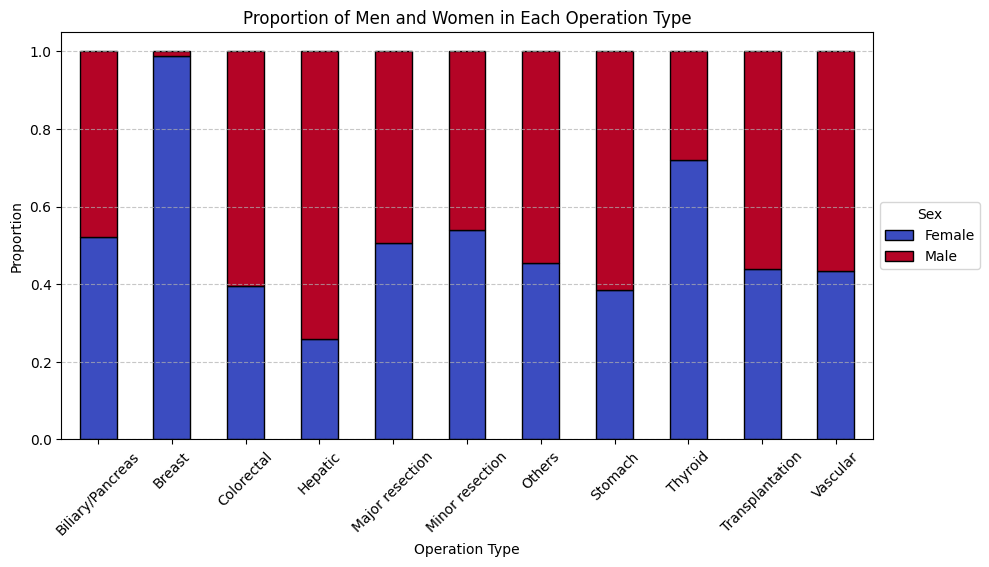

In [96]:
df = surgery_data[['optype', 'weight', 'sex']].copy()

optype_sex_counts = df.groupby(['optype', 'sex']).size().unstack(fill_value=0)
optype_sex_props = optype_sex_counts.div(optype_sex_counts.sum(axis=1), axis=0)


optype_sex_props.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', edgecolor='black')

# Labels and title
plt.xlabel('Operation Type')
plt.ylabel('Proportion')
plt.title('Proportion of Men and Women in Each Operation Type')
plt.legend(title='Sex', labels=['Female', 'Male'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)